In [64]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
direc = "E:\\WS4PD_data"
os.chdir(direc)
# load data
demogra_data = pd.read_csv("Demographics_data.csv")
task_score = pd.read_csv("Task_scores_part_I.csv")
save_path = os.path.join(direc, "Figures", "Demographic_and_clinical_data")

In [3]:
demogra_data

,ROW_ID,ROW_VERSION,subject_id,cohort,gender,birth_year,dominant_hand,upper_limb_length,upper_arm_length,lower_arm_length,...,recording_end,timezone,updrs_time,updrs_score_p1,updrs_score_p2,updrs_score_p3,updrs_score_p4,h_and_y_score,updrs_second_visit_time,updrs_second_visit_score_p3
0,1,1,7_NYC,PD,Male,1956,Right,NaN,33,29,...,14:54:00,Eastern Daylight Time (GMT -4),12:07:00,24,22,55,8,NaN,11:56:00,61
1,2,1,2_NYC,PD,Male,1959,Right,NaN,32,26,...,14:44:00,Eastern Standard Time (GMT -5),12:39:00,13,14,10,13,2.0,9:50:00,22
2,3,1,3_NYC,PD,Male,1969,Right,NaN,32,29,...,14:14:00,Eastern Daylight Time (GMT -4),12:33:00,12,16,16,4,2.0,10:15:00,35
3,4,1,4_NYC,PD,Male,1952,Right,NaN,36,28,...,13:34:00,Eastern Daylight Time (GMT -4),13:44:00,0,7,19,0,2.0,9:40:00,36
4,5,1,5_NYC,PD,Male,1960,Right,NaN,25,28,...,13:02:00,Eastern Daylight Time (GMT -4),12:00:00,12,10,12,11,2.0,8:24:00,37
5,6,1,6_NYC,PD,Female,1961,Right,NaN,28,25,...,13:15:00,Eastern Daylight Time (GMT -4),11:25:00,5,9,8,7,2.0,9:30:00,16
6,7,1,8_NYC,PD,Male,1943,Right,NaN,27,28,...,14:52:00,Eastern Daylight Time (GMT -4),11:32:00,16,15,32,10,2.0,11:00:00,16
7,8,1,9_NYC,PD,Female,1945,Right,NaN,28,23,...,14:44:00,Eastern Daylight Time (GMT -4),12:05:00,11,10,15,10,2.0,10:35:00,22
8,9,1,10_NYC,PD,Female,1958,Right,NaN,29,25,...,12:36:00,Eastern Daylight Time (GMT -4),NaN,4,6,8,1,2.0,9:43:00,6
9,10,1,11_NYC,PD,Female,1954,Right,NaN,30,25,...,12:02:00,Eastern Daylight Time (GMT -4),NaN,14,11,7,6,2.0,8:40:00,14


In [4]:
# Manual correction
# The diagnosis year for subject #20 is 2006-2007, and we choose 2006 as the diagnosis year 
demogra_data.loc[20,'diagnosis_year'] = 2006

In [89]:
# summary 
# gender
is_male = demogra_data.gender=='Male'
is_female = demogra_data.gender=='Female'
print('Male: '+ str(sum(is_male)))
print('Female: ' + str(sum(is_female)))

Male: 19
Female: 9


In [6]:
# patients from the Boston clinical site 
is_BOS = demogra_data['subject_id'].str.contains('BOS')
# patients from the New York clinical site 
is_NY = demogra_data['subject_id'].str.contains('NY')
print('Boston group: '+ str(sum(is_BOS)) +\
      ' (' + str(sum(is_BOS & is_male)) +'M' + str(sum(is_BOS & is_female)) +'F)')
print('New York group: ' + str(sum(is_NY)) +\
     ' (' + str(sum(is_NY & is_male)) +'M' + str(sum(is_NY & is_female)) +'F)')

Boston group: 17 (12M5F)
New York group: 11 (7M4F)


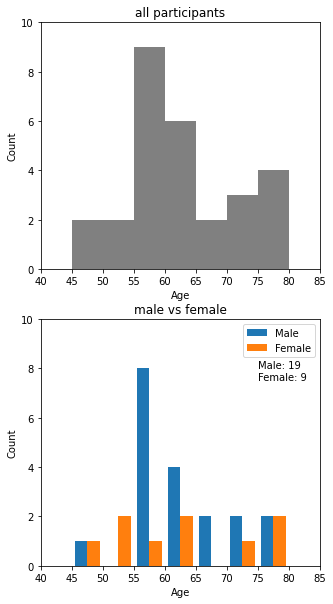

In [7]:
# age
visit_year  = 2015 # Data was collected in 2015
age = visit_year - demogra_data['birth_year']
age_male = visit_year - demogra_data['birth_year'].loc[is_male]
age_female = visit_year - demogra_data['birth_year'].loc[is_female]

binwidth = 5
x_lim = [40, 85]
y_lim = [0, 10]

fig, (ax0, ax1) = plt.subplots(figsize=(5,10),nrows=2, ncols=1)
ax0.hist(age, histtype='bar', color = 'grey', bins=range(x_lim[0], x_lim[1], binwidth))
ax0.set_title('all participants')
ax0.set(xlim=x_lim, ylim=y_lim)
ax0.set_xlabel('Age')
ax0.set_ylabel('Count')

ax1.hist([age_male, age_female], histtype='bar', label=['Male', 'Female'],
         bins=range(x_lim[0], x_lim[1], binwidth))
ax1.legend(prop={'size': 10})
ax1.set_title('male vs female')
ax1.set(xlim=x_lim, ylim=y_lim)
ax1.set_xlabel('Age')
ax1.set_ylabel('Count')
ax1.text(75,8,'Male: '+ str(sum(is_male)))
ax1.text(75,7.5,'Female: ' + str(sum(is_female)))

# save figure
plt.savefig(os.path.join(save_path,"Age"))

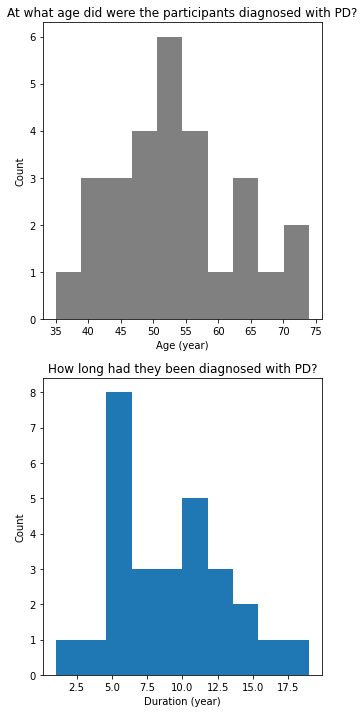

In [8]:
# diagnosis year
# At what age did were the participants diagnosed with PD? 
age_diagnosis = demogra_data['diagnosis_year'].astype('int64') - demogra_data['birth_year']

# How long had they been diagnosed with PD?
duration = visit_year - demogra_data['diagnosis_year'].astype('int64')

# plot
fig, (ax0, ax1) = plt.subplots(figsize=(5,12),nrows=2, ncols=1)
ax0.hist(age_diagnosis, histtype='bar', color = 'grey')
ax0.set_title('At what age did were the participants diagnosed with PD?')
# ax0.set(xlim=x_lim, ylim=y_lim)
ax0.set_xlabel('Age (year)')
ax0.set_ylabel('Count')

ax1.hist(duration, rwidth=3, histtype='bar')
ax1.set_title('How long had they been diagnosed with PD?')
# ax1.set(xlim=x_lim, ylim=y_lim)
ax1.set_xlabel('Duration (year)')
ax1.set_ylabel('Count')

# save figure
plt.savefig(os.path.join(save_path,"Diagnosis_year"))

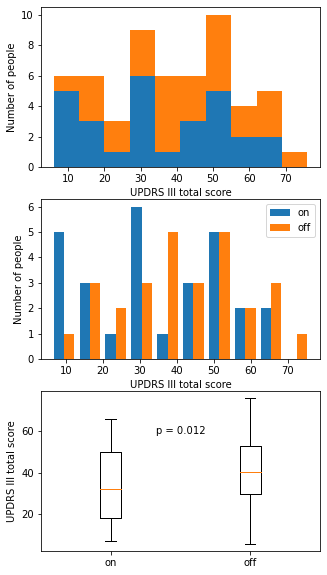

In [9]:
# symptom severity 
# on vs off medication
# on medication: MDS-UPDRS and 6*motor tasks on day 1; 5*motor tasks on day 4 
# off midication: MDS-UPDRS, the first motor task on day 4

# MDS-UPDRS
updrs_on = demogra_data['updrs_score_p3']
updrs_off = demogra_data['updrs_second_visit_score_p3']
# updrs = updrs_on.append(updrs_off)
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(5,10),nrows=3, ncols=1)
# ax0.hist(updrs, histtype='bar',color='grey')
ax0.hist([updrs_on, updrs_off], histtype='bar',stacked=True)
ax0.set_xlabel('UPDRS III total score')
ax0.set_ylabel('Number of people')
ax1.hist([updrs_on, updrs_off], histtype='bar',label=['on', 'off'])
ax1.legend(prop={'size': 10})
ax1.set_xlabel('UPDRS III total score')
ax1.set_ylabel('Number of people')
ax2.boxplot([updrs_on, updrs_off], labels=['on','off'])
ax2.set_ylabel('UPDRS III total score')
# paired t test
statistics, pvalue = stats.ttest_rel(updrs_on, updrs_off)
ax2.text(1.5,60,'p = ' + str(round(pvalue,3)),
         horizontalalignment='center', verticalalignment='center')
# save figure
plt.savefig(os.path.join(save_path,"UPDRS"))

In [65]:
task_score

,ROW_ID,ROW_VERSION,subject_id,visit,session,task_id,task_code,repetition,timestamp_start,timestamp_end,phenotype,body_segment,score
0,1,1,3_BOS,1,1,1,stndg,1,1423568629,1423568661,tremor,RightUpperLimb,0
1,2,1,3_BOS,1,1,1,stndg,1,1423568629,1423568661,tremor,LeftUpperLimb,0
2,3,1,3_BOS,1,1,1,stndg,1,1423568629,1423568661,tremor,LowerLimbs,0
3,4,1,3_BOS,1,1,1,stndg,1,1423568629,1423568661,dyskinesia,RightUpperLimb,Yes
4,5,1,3_BOS,1,1,1,stndg,1,1423568629,1423568661,dyskinesia,LeftUpperLimb,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62194,62195,22,12_NYC,2,8,260,sittg,1,1435327148,1435327182,dyskinesia,LeftUpperLimb,No
62195,62196,22,12_NYC,2,8,260,sittg,1,1435327148,1435327182,dyskinesia,LowerLimbs,No
62196,62197,22,12_NYC,2,8,260,sittg,1,1435327148,1435327182,bradykinesia,RightUpperLimb,No
62197,62198,22,12_NYC,2,8,260,sittg,1,1435327148,1435327182,bradykinesia,LeftUpperLimb,No


In [ ]:
# symptom severity 
# on vs off medication
# on medication: MDS-UPDRS and 6*motor tasks on day 1; 5*motor tasks on day 4 
# off midication: MDS-UPDRS, the first motor task on day 4

# Motor task scores
# phenotype index
is_tremor = task_score['phenotype']=='tremor'
is_dyskinesia = task_score['phenotype']=='dyskinesia'
is_bradykinesia = task_score['phenotype']=='bradykinesia'
phe_indx = np.array([is_tremor, is_dyskinesia, is_bradykinesia])
# body segment index
is_RUL = task_score['body_segment']=='RightUpperLimb'
is_LUL = task_score['body_segment']=='LeftUpperLimb'
is_BLL = task_score['body_segment']=='LowerLimbs' 
bs_indx = np.array([is_RUL, is_LUL, is_BLL])
# medication status index
is_off = np.logical_and(task_score['visit']==2, task_score['session']==1)

row_titles = np.array(['Tremor','Dyskinesia','Bradykinesia'])
col_titles = np.array(['RightUpperLimb','LeftUpperLimb','LowerLimbs'])

fig, axs = plt.subplots(figsize=(12,12),nrows=3, ncols=3)
for phe in range(3):
    for bs in range(3):
        data_on = task_score['score'].loc[phe_indx[phe] & bs_indx[bs] & ~is_off]
        data_off = task_score['score'].loc[phe_indx[phe] & bs_indx[bs] & is_off]
        axs[phe,bs].hist([data_on, data_off],histtype='bar',stacked=True)
#         data = task_score['score'].loc[phe_indx[phe] & bs_indx[bs]]
#         axs[phe,bs].hist(data)
        if phe==0:
           axs[phe,bs].set_title(col_titles[bs]) 
        if bs==0:
           axs[phe,bs].set_ylabel(row_titles[phe] + '\n' + 'Count') 
# save figure
plt.savefig(os.path.join(save_path,"Motor_task"))

fig, axs = plt.subplots(figsize=(12,12),nrows=3, ncols=3)
for phe in range(3):
    for bs in range(3):
        data_off = task_score['score'].loc[phe_indx[phe] & bs_indx[bs] & is_off]
        axs[phe,bs].hist(data_off,histtype='bar',color='orange')
#         data = task_score['score'].loc[phe_indx[phe] & bs_indx[bs]]
#         axs[phe,bs].hist(data)
        if phe==0:
           axs[phe,bs].set_title(col_titles[bs]) 
        if bs==0:
           axs[phe,bs].set_ylabel(row_titles[phe] + '\n' + 'Count') 
# save figure
plt.savefig(os.path.join(save_path,"Motor_task_off_medication"))

In [ ]:
# Boston vs NY groups 

# age
age_mean_BOS = np.mean(age[is_BOS])
age_std_BOS = np.std(age[is_BOS])
age_mean_NY = np.mean(age[is_NY])
age_std_NY = np.std(age[is_NY])

width = 0.5
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(5,15),nrows=3, ncols=1)
ax0.bar(1,age_mean_BOS, width, yerr=age_std_BOS, label='BOS')
ax0.bar(2,age_mean_NY, width, yerr=age_std_NY, label='NY')
ax0.set_ylabel('Age')
ax0.set_xticks([1,2], labels=['BOS', 'NY'])

# UPDRS score (on medication)
sc_mean_BOS = np.mean(updrs_on[is_BOS])
sc_std_BOS = np.std(updrs_on[is_BOS])
sc_mean_NY = np.mean(updrs_on[is_NY])
sc_std_NY = np.std(updrs_on[is_NY])

ax1.bar(1,sc_mean_BOS, width, yerr=sc_std_BOS, label='BOS')
ax1.bar(2,sc_mean_NY, width, yerr=sc_std_NY, label='NY')
ax1.set_ylabel('UPDRS score (on med.)')
ax1.set_xticks([1,2], labels=['BOS', 'NY'])

# UPDRS score (off medication)
scf_mean_BOS = np.mean(updrs_off[is_BOS])
scf_std_BOS = np.std(updrs_off[is_BOS])
scf_mean_NY = np.mean(updrs_off[is_NY])
scf_std_NY = np.std(updrs_off[is_NY])

ax2.bar(1,scf_mean_BOS, width, yerr=scf_std_BOS, label='BOS')
ax2.bar(2,scf_mean_NY, width, yerr=scf_std_NY, label='NY')
ax2.set_ylabel('UPDRS score (off med.)')
ax2.set_xticks([1,2], labels=['BOS', 'NY'])

# save figure
plt.savefig(os.path.join(save_path,"BOS_NY_comparison"))

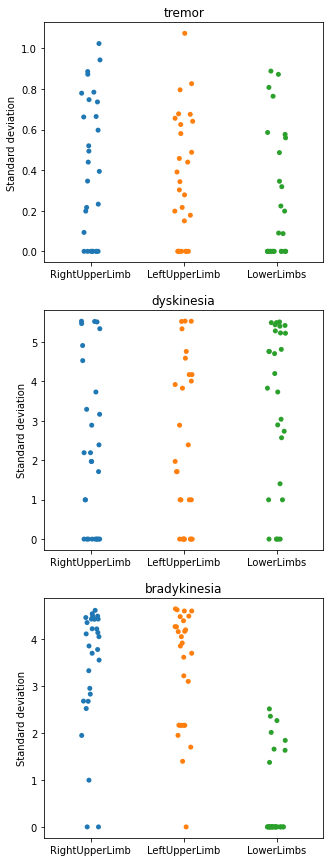

In [42]:
# Symptom variability within the same patient
# Scores from different tasks are pooled.

# subject_ids = task_score.subject_id.unique()
# # task_codes = task_score.task_code.unique()
# phenotypes = task_score.phenotype.unique()
# body_segments = task_score.body_segment.unique()
# symp_std = np.zeros((len(subject_ids),len(body_segments)))
# visit=1
# fig, axs = plt.subplots(figsize=(5,15),nrows=3, ncols=1)
# for phe,a in zip(phenotypes,range(len(phenotypes))):
#     for bd,b in zip(body_segments,range(len(body_segments))):
#         for sub,c in zip(subject_ids, range(len(subject_ids))):
#             is_trials = (task_score.subject_id == sub) & (task_score.visit == visit) &\
#             (task_score.phenotype == phe) & (task_score.body_segment == bd)
#             if phe == 'tremor':
#                 scores = task_score.score[is_trials].astype(int)
#                 symp_std[c,b] = np.std(scores)
#             elif phe == 'dyskinesia': 
#                 scores = task_score.score[is_trials]
#                 p = sum(scores == 'Yes')/len(scores)
#                 std = np.sqrt(len(scores)*p*(1-p))
#                 symp_std[c,b] = std
#             elif phe == 'bradykinesia': 
#                 scores = task_score.score[is_trials]
#                 is_yes = scores == 'Yes'
#                 is_na = scores == 'NotApplicable'
#                 n = sum(~is_na)
#                 p = sum(is_yes)/n
#                 std = np.sqrt(n*p*(1-p))
#                 symp_std[c,b] = std            
#     df = pd.DataFrame(symp_std, columns=body_segments)
#     sns.stripplot(data=df, ax=axs[a])
#     axs[a].set_ylabel('Standard deviation')
#     axs[a].set_title(phe)
# # save figure
# plt.savefig(os.path.join(save_path,"Task_Score_SD"))
                      
        

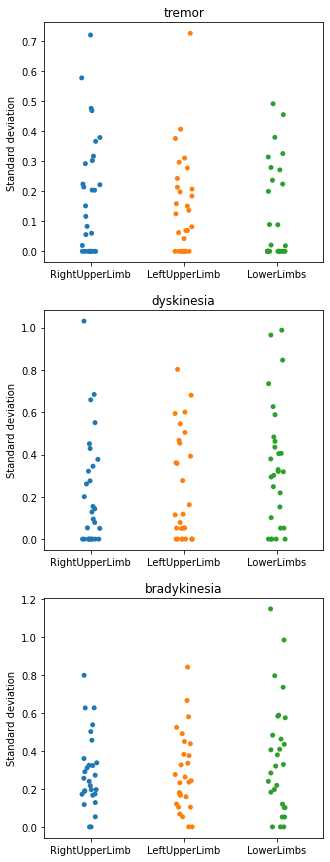

In [59]:
# Symptom variability within the same patient
subject_ids = task_score.subject_id.unique()
task_codes = task_score.task_code.unique()
phenotypes = task_score.phenotype.unique()
body_segments = task_score.body_segment.unique()
symp_std_task = np.zeros((len(subject_ids),len(body_segments),len(task_codes)))
visit=1
fig, axs = plt.subplots(figsize=(5,15),nrows=3, ncols=1)

###### replace following for loops with index,value in enumerate(lst) 
for phe,a in zip(phenotypes,range(len(phenotypes))):
    for bd,b in zip(body_segments,range(len(body_segments))):
        for sub,c in zip(subject_ids, range(len(subject_ids))):
            for task,d in zip(task_codes, range(len(task_codes))):
                is_trials = (task_score.subject_id == sub) & (task_score.visit == visit) &\
                (task_score.task_code == task) & (task_score.phenotype == phe) &\
                (task_score.body_segment == bd)             
                if phe == 'tremor':
                    scores = task_score.score[is_trials].astype(int)
                    symp_std_task[c,b,d] = np.std(scores)
                elif phe == 'dyskinesia': 
                    scores = task_score.score[is_trials]
                    p = sum(scores == 'Yes')/len(scores)
                    std = np.sqrt(len(scores)*p*(1-p))
                    symp_std_task[c,b,d] = std
                elif phe == 'bradykinesia': 
                    scores = task_score.score[is_trials]
                    is_yes = scores == 'Yes'
                    is_na = scores == 'NotApplicable'
                    n = sum(~is_na)
                    if n==0:
                        std = 'NaN'
                    else:
                        p = sum(is_yes)/n
                        if p==0:
                            std = 0
                        else:
                            std = np.sqrt(n*p*(1-p))
                        symp_std_task[c,b,d] = std 
                symp_std = np.mean(symp_std_task,axis=2)
                    
    df = pd.DataFrame(symp_std, columns=body_segments)
    sns.stripplot(data=df, ax=axs[a])
    axs[a].set_ylabel('Standard deviation')
    axs[a].set_title(phe)
# save figure
plt.savefig(os.path.join(save_path,"Task_Score_SD"))